In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats

In [6]:
# Data.tsv is stored locally in the 
# same directory as of this python file
df = pd.read_csv("city_market_tracker.tsv",sep = '\t', chunksize=500000)

In [7]:
i = 1
while True:
    try:
        my_data_set_chunk = next(df)
        my_df = pd.DataFrame(my_data_set_chunk)
        my_df.to_csv(f'file{i}.csv')
        i += 1

    except StopIteration:
        break

In [3]:
# set the max columns to none
pd.set_option('display.max_columns', None)

In [2]:
us_housing_market_df = pd.read_csv('city_market_tracker.tsv', sep='\t')

In [4]:
us_housing_market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5484743 entries, 0 to 5484742
Data columns (total 58 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   period_begin                    object 
 1   period_end                      object 
 2   period_duration                 int64  
 3   region_type                     object 
 4   region_type_id                  int64  
 5   table_id                        int64  
 6   is_seasonally_adjusted          object 
 7   region                          object 
 8   city                            object 
 9   state                           object 
 10  state_code                      object 
 11  property_type                   object 
 12  property_type_id                int64  
 13  median_sale_price               float64
 14  median_sale_price_mom           float64
 15  median_sale_price_yoy           float64
 16  median_list_price               float64
 17  median_list_price_mom      

In [5]:
us_housing_market_df.sample(3)

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
1714340,2020-08-01,2020-08-31,30,place,6,1544,f,"Bethel Acres, OK",Bethel Acres,Oklahoma,OK,All Residential,-1,162250.0,-0.366211,-0.122736,235000.0,1.232790,-0.159213,96.864380,-0.029661,-0.099784,114.244045,0.364803,-0.165838,2.0,0.000000,-0.500000,3.0,0.500000,2.0,1.0,-0.500000,-0.500000,1.0,-0.666667,-0.800000,0.5,-1.0,-0.8,42.0,39.0,24.0,0.982569,-0.034097,-0.002319,0.0,-0.500000,-0.250000,1.000000,NaN,0.800000,0.333333,0.333333,0.333333,"Shawnee, OK",43060,2024-07-15 17:39:34
5396593,2019-05-01,2019-05-31,30,place,6,18896,f,"Waianae, HI",Waianae,Hawaii,HI,All Residential,-1,385000.0,0.170213,0.026667,188900.0,-0.547002,-0.509351,379.406566,0.205208,0.206015,410.667774,0.197970,0.215241,10.0,-0.473684,-0.333333,11.0,-0.153846,0.0,23.0,-0.041667,0.095238,77.0,0.115942,0.166667,7.7,4.1,3.3,75.0,-2.0,13.0,0.978449,0.006155,0.008331,0.2,0.094737,0.133333,0.116883,0.000941,0.010823,0.090909,0.013986,0.000000,"Honolulu, HI",46520,2024-07-15 17:39:34
151574,2019-02-01,2019-02-28,30,place,6,25659,f,"Quinnesec, MI",Quinnesec,Michigan,MI,Single Family Residential,6,80000.0,NaN,NaN,NaN,NaN,NaN,51.085568,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153.0,NaN,NaN,0.963855,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Iron Mountain, MI",27020,2024-07-15 17:39:34


In [9]:
# count number of nulls for each row
nul_sel = us_housing_market_df.isna()
# null rows
nul_rows_df = nul_sel.sum()
nul_rows_df

period_begin                            0
period_end                              0
period_duration                         0
region_type                             0
region_type_id                          0
table_id                                0
is_seasonally_adjusted                  0
region                                  0
city                                    0
state                                   0
state_code                              0
property_type                           0
property_type_id                        0
median_sale_price                    6136
median_sale_price_mom             1028323
median_sale_price_yoy             1130318
median_list_price                  897050
median_list_price_mom             1626010
median_list_price_yoy             1730886
median_ppsf                         71619
median_ppsf_mom                   1083756
median_ppsf_yoy                   1186107
median_list_ppsf                   916811
median_list_ppsf_mom              

In [11]:
# get the count for the total number of null vales
total_null_values = nul_rows_df.sum()
total_null_values

52156152

In [12]:
total_number_rows = len(us_housing_market_df)
total_number_columns = len(us_housing_market_df.columns)
total_number_rows, total_number_columns

(5484743, 58)

In [17]:
# getting number of columns that have mom or yoy in their names
# column with yoy or mom
columns_yoy_mom = list(name for name in us_housing_market_df.columns if 'yoy' in name or 'mom' in name)
len(columns_yoy_mom)

28

In [62]:
copy_dropped_yoy_mom = us_housing_market_df.drop(columns=columns_yoy_mom)
copy_dropped_yoy_mom

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,state_code,property_type,property_type_id,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,price_drops,off_market_in_two_weeks,parent_metro_region,parent_metro_region_metro_code,last_updated
0,2016-05-01,2016-05-31,30,place,6,34011,f,"Morgandale, OH",Morgandale,Ohio,OH,Single Family Residential,6,80250.0,79750.0,84.988962,68.641505,2.0,NaN,4.0,9.0,4.5,75.0,0.946257,0.000000,0.111111,NaN,"Youngstown, OH",49660,2024-07-15 17:39:34
1,2019-06-01,2019-06-30,30,place,6,5683,f,"Durant, OK",Durant,Oklahoma,OK,All Residential,-1,144000.0,162500.0,85.099338,89.861751,21.0,14.0,17.0,89.0,4.2,61.0,0.968203,0.238095,NaN,0.142857,"Durant, OK",20460,2024-07-15 17:39:34
2,2013-11-01,2013-11-30,30,place,6,36081,f,"Village of Oak Creek (Big Park), AZ",Village of Oak Creek (Big Park),Arizona,AZ,Townhouse,13,318500.0,344450.0,193.852708,200.025699,1.0,1.0,1.0,11.0,11.0,27.0,0.951030,0.000000,NaN,0.000000,"Prescott Valley, AZ",39150,2024-07-15 17:39:34
3,2018-10-01,2018-10-31,30,place,6,10194,f,"Lake Lotawana, MO",Lake Lotawana,Missouri,MO,All Residential,-1,374367.5,525000.0,172.706522,217.669654,4.0,NaN,5.0,NaN,9.0,158.0,NaN,NaN,0.277778,0.333333,"Kansas City, MO",28140,2024-07-15 17:39:34
4,2022-02-01,2022-02-28,30,place,6,17029,f,"Seaside Heights, NJ",Seaside Heights,New Jersey,NJ,Condo/Co-op,3,285000.0,499450.0,319.257312,353.395349,3.0,1.0,7.0,13.0,4.3,197.0,0.984100,0.333333,NaN,0.000000,"New Brunswick, NJ",35154,2024-07-15 17:39:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5484738,2015-10-01,2015-10-31,30,place,6,20714,f,"West Pittston, PA",West Pittston,Pennsylvania,PA,All Residential,-1,27000.0,116250.0,19.081272,75.946906,5.0,2.0,4.0,27.0,5.4,92.0,0.846291,0.000000,NaN,0.000000,"Scranton, PA",42540,2024-07-15 17:39:34
5484739,2018-12-01,2018-12-31,30,place,6,30480,f,"Pittstown, NY",Pittstown,New York,NY,All Residential,-1,217500.0,NaN,101.137415,NaN,6.0,3.0,NaN,22.0,3.7,99.0,0.960092,0.000000,0.181818,0.333333,"Albany, NY",10580,2024-07-15 17:39:34
5484740,2016-10-01,2016-10-31,30,place,6,25346,f,"Pimmit Hills, VA",Pimmit Hills,Virginia,VA,All Residential,-1,567000.0,649975.0,461.165049,261.265487,7.0,11.0,10.0,26.0,3.7,46.0,0.992627,0.142857,0.153846,0.454545,"Washington, DC",47894,2024-07-15 17:39:34
5484741,2016-01-01,2016-01-31,30,place,6,11887,f,"Lincolnton, GA",Lincolnton,Georgia,GA,Single Family Residential,6,93850.0,128900.0,50.784632,92.106892,1.0,NaN,2.0,8.0,8.0,163.0,0.853182,0.000000,NaN,NaN,"Augusta, GA",12260,2024-07-15 17:39:34


Note that the following columns display ratios...

1. avg_sale_to_list
2. sold_above_list
3. price_drops
4. off_market_in_two_weeks

Other columns that I'm thinkinh about removing...

---for sure to drop---
- region_type_id (doesn't really give much information)
- table_id (can drop old id values)
- state_code (information already encoded in state)
- property_type_id (not needed since already have (property_type)
- parent_metro_region_metro_code (information is already encoded in)
- last_updated (not super important to my analysis)
- period_end (all period_durations are for 30 days, unnecessary information)
- region (information aleready encoded in the city and state columns)

---columns that I need to investigate---
- period_duration (see if there are other unique values rather than just 30 days)
- region_type (see if there are other unique values rather than just place)
- is_seasonally_adjusted (if there are no other values besides "f")

In [63]:
# more columns to drop
duplicate_info_columns = [
    'region_type_id', 
    'table_id', 
    'state_code', 
    'property_type_id', 
    'parent_metro_region_metro_code', 
    'last_updated',
    'period_end', 
    'region']
copy_dropped_duplicate_info_columns = copy_dropped_yoy_mom.drop(columns=duplicate_info_columns)
copy_dropped_duplicate_info_columns

,period_begin,period_duration,region_type,is_seasonally_adjusted,city,state,property_type,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,price_drops,off_market_in_two_weeks,parent_metro_region
0,2016-05-01,30,place,f,Morgandale,Ohio,Single Family Residential,80250.0,79750.0,84.988962,68.641505,2.0,NaN,4.0,9.0,4.5,75.0,0.946257,0.000000,0.111111,NaN,"Youngstown, OH"
1,2019-06-01,30,place,f,Durant,Oklahoma,All Residential,144000.0,162500.0,85.099338,89.861751,21.0,14.0,17.0,89.0,4.2,61.0,0.968203,0.238095,NaN,0.142857,"Durant, OK"
2,2013-11-01,30,place,f,Village of Oak Creek (Big Park),Arizona,Townhouse,318500.0,344450.0,193.852708,200.025699,1.0,1.0,1.0,11.0,11.0,27.0,0.951030,0.000000,NaN,0.000000,"Prescott Valley, AZ"
3,2018-10-01,30,place,f,Lake Lotawana,Missouri,All Residential,374367.5,525000.0,172.706522,217.669654,4.0,NaN,5.0,NaN,9.0,158.0,NaN,NaN,0.277778,0.333333,"Kansas City, MO"
4,2022-02-01,30,place,f,Seaside Heights,New Jersey,Condo/Co-op,285000.0,499450.0,319.257312,353.395349,3.0,1.0,7.0,13.0,4.3,197.0,0.984100,0.333333,NaN,0.000000,"New Brunswick, NJ"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5484738,2015-10-01,30,place,f,West Pittston,Pennsylvania,All Residential,27000.0,116250.0,19.081272,75.946906,5.0,2.0,4.0,27.0,5.4,92.0,0.846291,0.000000,NaN,0.000000,"Scranton, PA"
5484739,2018-12-01,30,place,f,Pittstown,New York,All Residential,217500.0,NaN,101.137415,NaN,6.0,3.0,NaN,22.0,3.7,99.0,0.960092,0.000000,0.181818,0.333333,"Albany, NY"
5484740,2016-10-01,30,place,f,Pimmit Hills,Virginia,All Residential,567000.0,649975.0,461.165049,261.265487,7.0,11.0,10.0,26.0,3.7,46.0,0.992627,0.142857,0.153846,0.454545,"Washington, DC"
5484741,2016-01-01,30,place,f,Lincolnton,Georgia,Single Family Residential,93850.0,128900.0,50.784632,92.106892,1.0,NaN,2.0,8.0,8.0,163.0,0.853182,0.000000,NaN,NaN,"Augusta, GA"


In [64]:
# let's investigate these columns
columns_to_investigate = ['period_duration', 'region_type', 'is_seasonally_adjusted']
# for each one print out how many distinct values they contain
for col in columns_to_investigate:
    print(copy_dropped_duplicate_info_columns[col].unique())
    print('*' * 80)

[30]
********************************************************************************
['place']
********************************************************************************
['f']
********************************************************************************


Each one of these columns that we have investigated, only have one distinct value each, we can drop them

In [65]:
copy_with_selections_dropped = copy_dropped_duplicate_info_columns.drop(columns=columns_to_investigate)
copy_with_selections_dropped

,period_begin,city,state,property_type,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,price_drops,off_market_in_two_weeks,parent_metro_region
0,2016-05-01,Morgandale,Ohio,Single Family Residential,80250.0,79750.0,84.988962,68.641505,2.0,NaN,4.0,9.0,4.5,75.0,0.946257,0.000000,0.111111,NaN,"Youngstown, OH"
1,2019-06-01,Durant,Oklahoma,All Residential,144000.0,162500.0,85.099338,89.861751,21.0,14.0,17.0,89.0,4.2,61.0,0.968203,0.238095,NaN,0.142857,"Durant, OK"
2,2013-11-01,Village of Oak Creek (Big Park),Arizona,Townhouse,318500.0,344450.0,193.852708,200.025699,1.0,1.0,1.0,11.0,11.0,27.0,0.951030,0.000000,NaN,0.000000,"Prescott Valley, AZ"
3,2018-10-01,Lake Lotawana,Missouri,All Residential,374367.5,525000.0,172.706522,217.669654,4.0,NaN,5.0,NaN,9.0,158.0,NaN,NaN,0.277778,0.333333,"Kansas City, MO"
4,2022-02-01,Seaside Heights,New Jersey,Condo/Co-op,285000.0,499450.0,319.257312,353.395349,3.0,1.0,7.0,13.0,4.3,197.0,0.984100,0.333333,NaN,0.000000,"New Brunswick, NJ"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5484738,2015-10-01,West Pittston,Pennsylvania,All Residential,27000.0,116250.0,19.081272,75.946906,5.0,2.0,4.0,27.0,5.4,92.0,0.846291,0.000000,NaN,0.000000,"Scranton, PA"
5484739,2018-12-01,Pittstown,New York,All Residential,217500.0,NaN,101.137415,NaN,6.0,3.0,NaN,22.0,3.7,99.0,0.960092,0.000000,0.181818,0.333333,"Albany, NY"
5484740,2016-10-01,Pimmit Hills,Virginia,All Residential,567000.0,649975.0,461.165049,261.265487,7.0,11.0,10.0,26.0,3.7,46.0,0.992627,0.142857,0.153846,0.454545,"Washington, DC"
5484741,2016-01-01,Lincolnton,Georgia,Single Family Residential,93850.0,128900.0,50.784632,92.106892,1.0,NaN,2.0,8.0,8.0,163.0,0.853182,0.000000,NaN,NaN,"Augusta, GA"


In [66]:
# how many total nulls?
copy_with_selections_dropped.isna().sum()

period_begin                     0
city                             0
state                            0
property_type                    0
median_sale_price             6136
median_list_price           897050
median_ppsf                  71619
median_list_ppsf            916811
homes_sold                    5710
pending_sales              1196615
new_listings                917420
inventory                   440012
months_of_supply            361102
median_dom                   73106
avg_sale_to_list            194260
sold_above_list              37177
price_drops                2609389
off_market_in_two_weeks    1090771
parent_metro_region              0
dtype: int64

In [67]:
copy_with_selections_dropped.isna().sum().sum()

8817178

In [68]:
# rename period_begin to 'Date'
copy_with_selections_dropped.rename(columns={'period_begin': 'Date'}, inplace=True)

In [69]:
# convert to DateTime
copy_with_selections_dropped['Date']= pd.to_datetime(copy_with_selections_dropped['Date'])
copy_with_selections_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5484743 entries, 0 to 5484742
Data columns (total 19 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   Date                     datetime64[ns]
 1   city                     object        
 2   state                    object        
 3   property_type            object        
 4   median_sale_price        float64       
 5   median_list_price        float64       
 6   median_ppsf              float64       
 7   median_list_ppsf         float64       
 8   homes_sold               float64       
 9   pending_sales            float64       
 10  new_listings             float64       
 11  inventory                float64       
 12  months_of_supply         float64       
 13  median_dom               float64       
 14  avg_sale_to_list         float64       
 15  sold_above_list          float64       
 16  price_drops              float64       
 17  off_market_in_two_weeks  fl

In [70]:
# only interested in the year and month
# add columns year and month
copy_with_selections_dropped['year'] = copy_with_selections_dropped['Date'].dt.year
copy_with_selections_dropped['month'] = copy_with_selections_dropped['Date'].dt.month

In [71]:
copy_with_selections_dropped.iloc[0]

Date                             2016-05-01 00:00:00
city                                      Morgandale
state                                           Ohio
property_type              Single Family Residential
median_sale_price                            80250.0
median_list_price                            79750.0
median_ppsf                                84.988962
median_list_ppsf                           68.641505
homes_sold                                       2.0
pending_sales                                    NaN
new_listings                                     4.0
inventory                                        9.0
months_of_supply                                 4.5
median_dom                                      75.0
avg_sale_to_list                            0.946257
sold_above_list                                  0.0
price_drops                                 0.111111
off_market_in_two_weeks                          NaN
parent_metro_region                   Youngsto

In [72]:
# drop the Date column
copy_with_selections_dropped.drop(columns='Date', inplace=True)
copy_with_selections_dropped.iloc[0]

city                                      Morgandale
state                                           Ohio
property_type              Single Family Residential
median_sale_price                            80250.0
median_list_price                            79750.0
median_ppsf                                84.988962
median_list_ppsf                           68.641505
homes_sold                                       2.0
pending_sales                                    NaN
new_listings                                     4.0
inventory                                        9.0
months_of_supply                                 4.5
median_dom                                      75.0
avg_sale_to_list                            0.946257
sold_above_list                                  0.0
price_drops                                 0.111111
off_market_in_two_weeks                          NaN
parent_metro_region                   Youngstown, OH
year                                          

In [74]:
copy_with_selections_dropped.head(4)

,city,state,property_type,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,price_drops,off_market_in_two_weeks,parent_metro_region,year,month
0,Morgandale,Ohio,Single Family Residential,80250.0,79750.0,84.988962,68.641505,2.0,NaN,4.0,9.0,4.5,75.0,0.946257,0.000000,0.111111,NaN,"Youngstown, OH",2016,5
1,Durant,Oklahoma,All Residential,144000.0,162500.0,85.099338,89.861751,21.0,14.0,17.0,89.0,4.2,61.0,0.968203,0.238095,NaN,0.142857,"Durant, OK",2019,6
2,Village of Oak Creek (Big Park),Arizona,Townhouse,318500.0,344450.0,193.852708,200.025699,1.0,1.0,1.0,11.0,11.0,27.0,0.951030,0.000000,NaN,0.000000,"Prescott Valley, AZ",2013,11
3,Lake Lotawana,Missouri,All Residential,374367.5,525000.0,172.706522,217.669654,4.0,NaN,5.0,NaN,9.0,158.0,NaN,NaN,0.277778,0.333333,"Kansas City, MO",2018,10


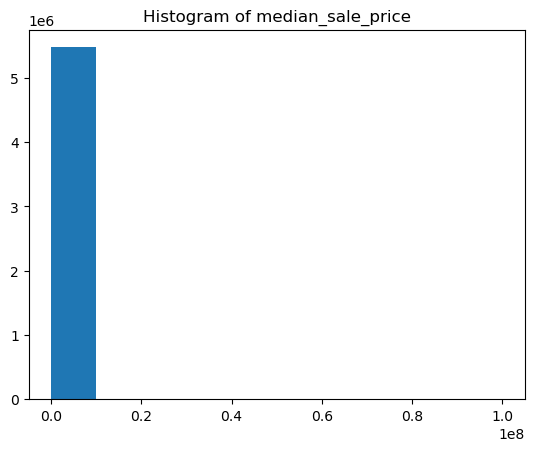

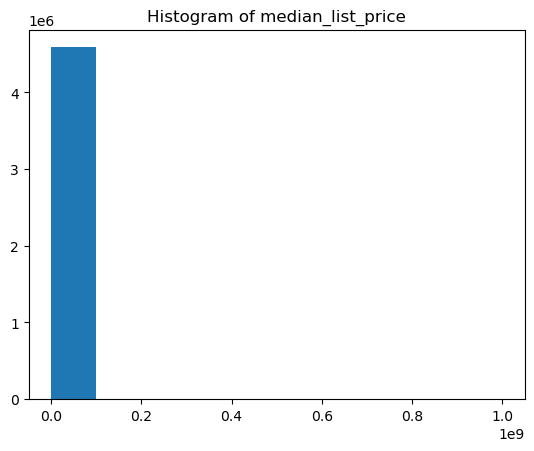

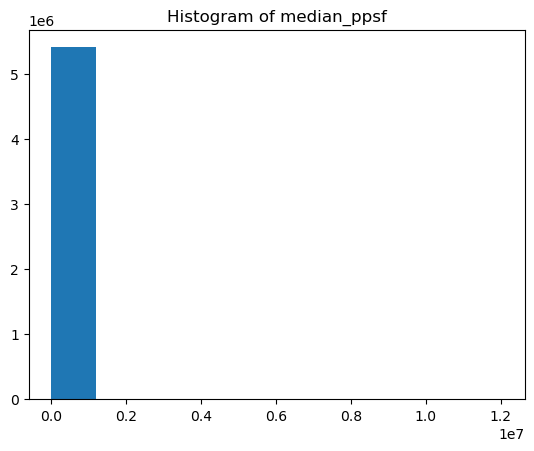

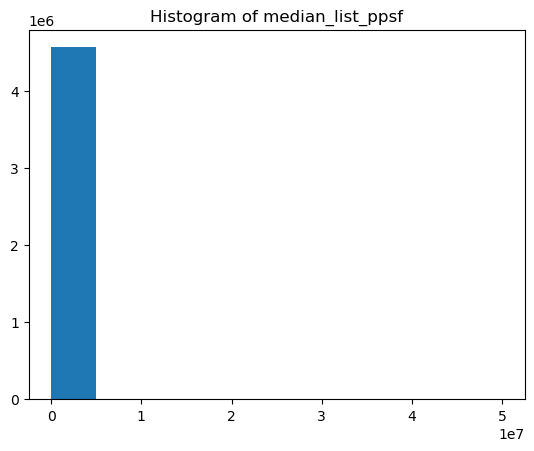

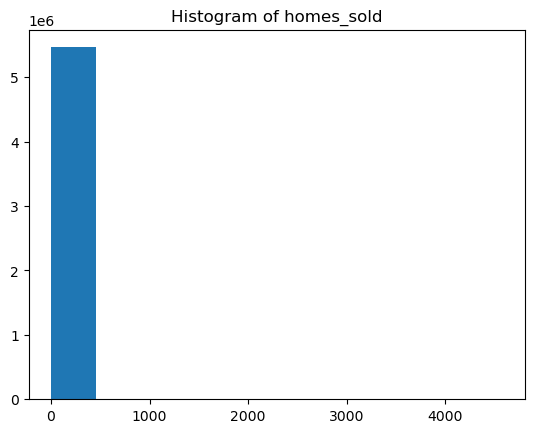

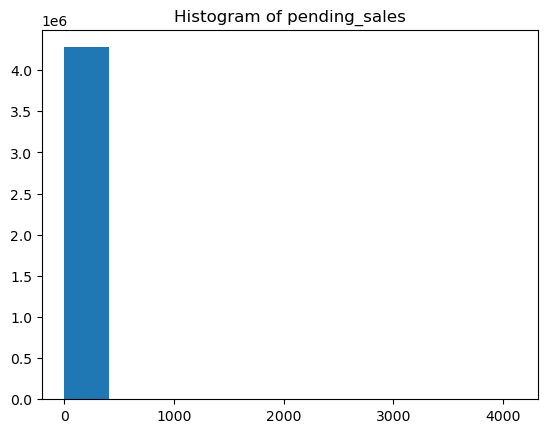

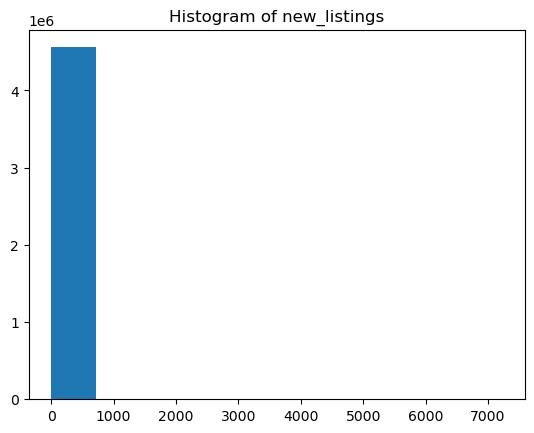

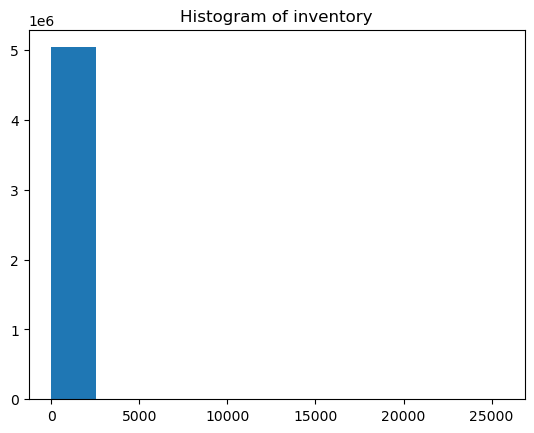

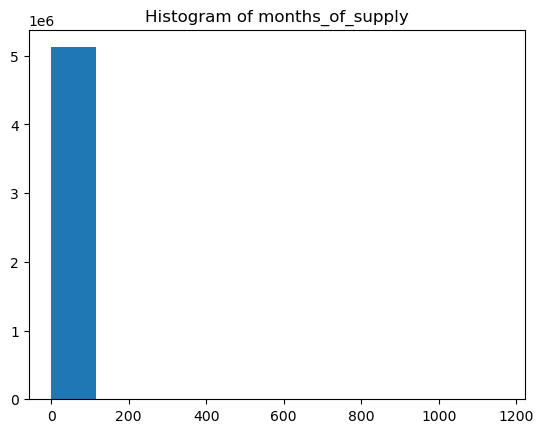

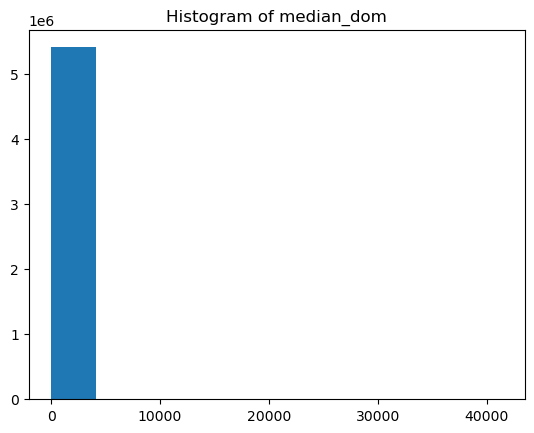

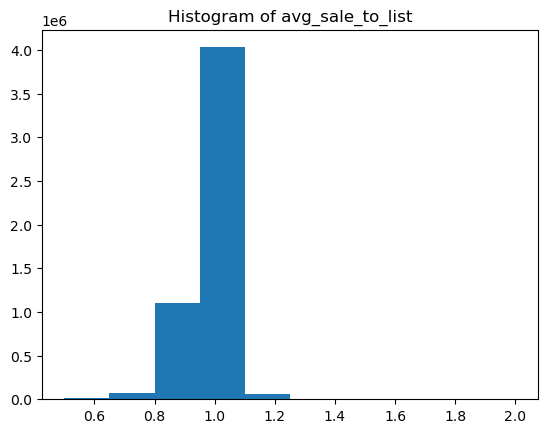

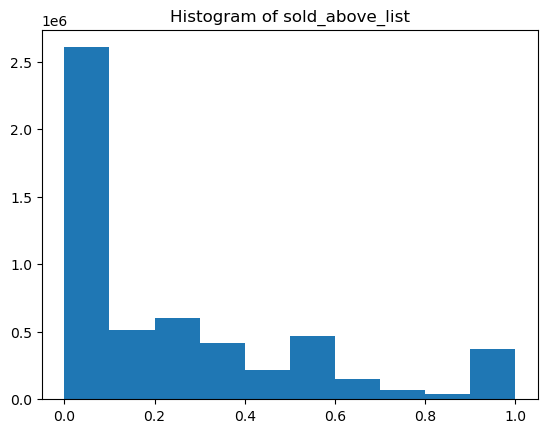

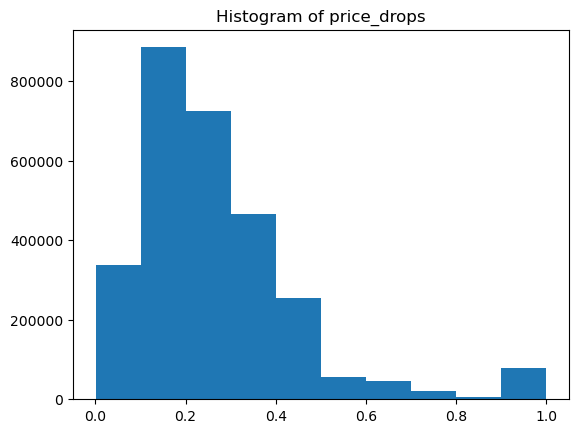

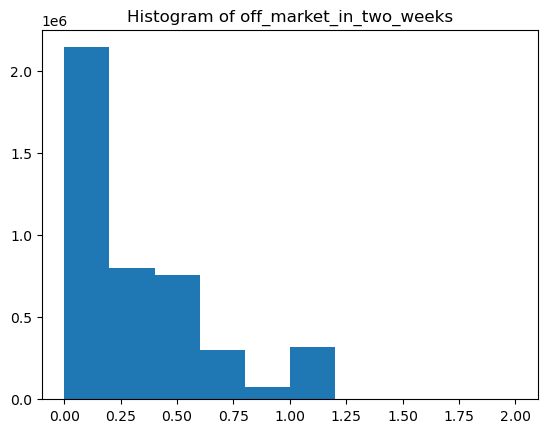

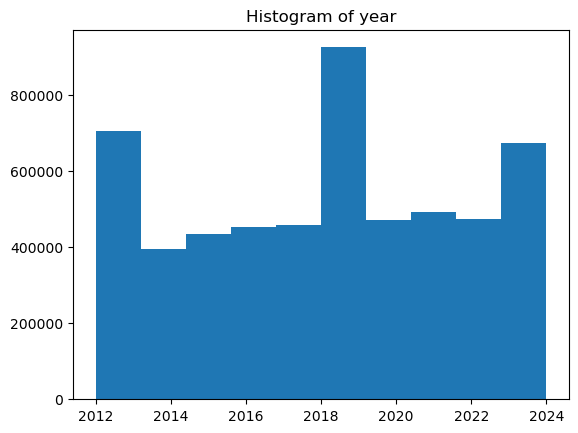

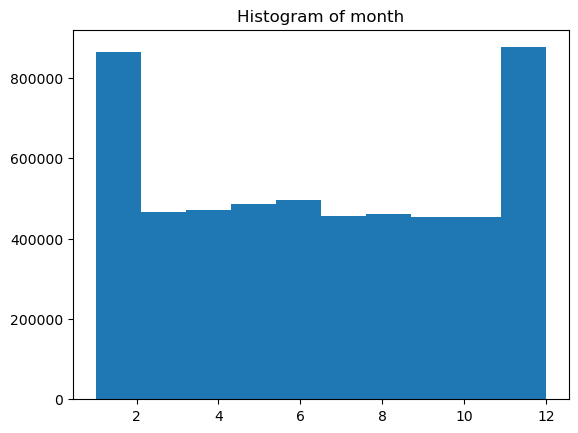

In [124]:
for col in copy_with_selections_dropped.select_dtypes('number').columns:
    plt.figure()
    plt.hist(copy_with_selections_dropped[col])
    plt.title(f'Histogram of {col}')
    plt.show()

Some of the columns to consider making histograms with log=True option

1. median_sale_price
2. median_list_price
3. median_ppsf
4. median_list_ppsf
5. homes_sold
6. pending_sales
7. new_listings
8. inventory
9. months_of_supply
10. median_dom
11. avg_sale_to_list

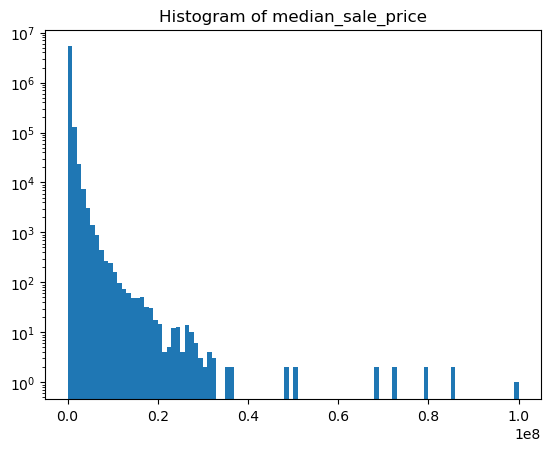

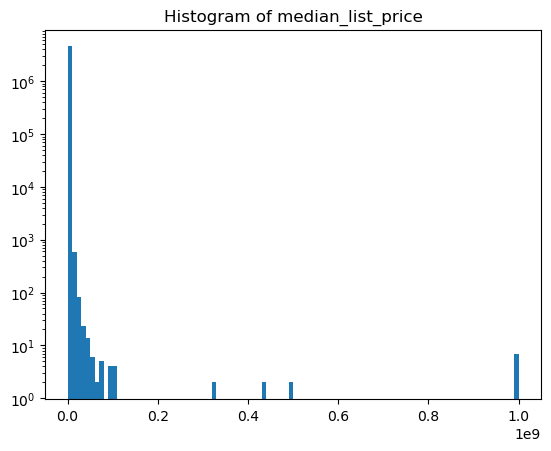

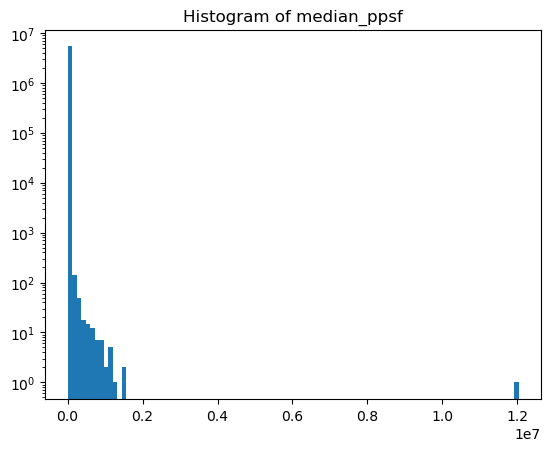

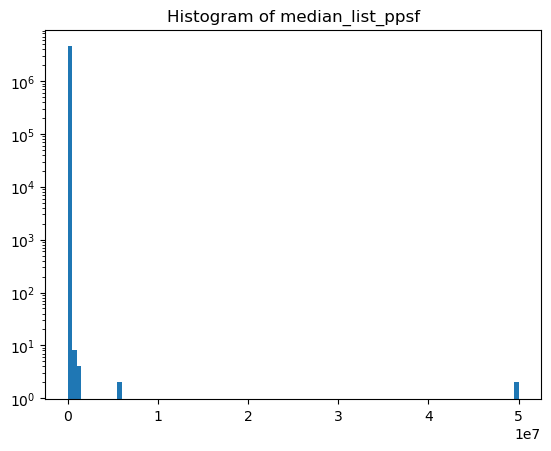

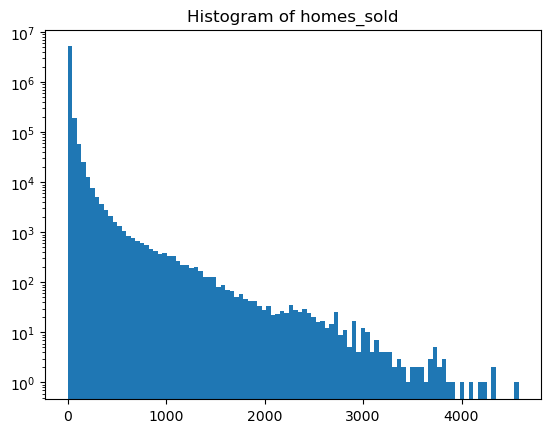

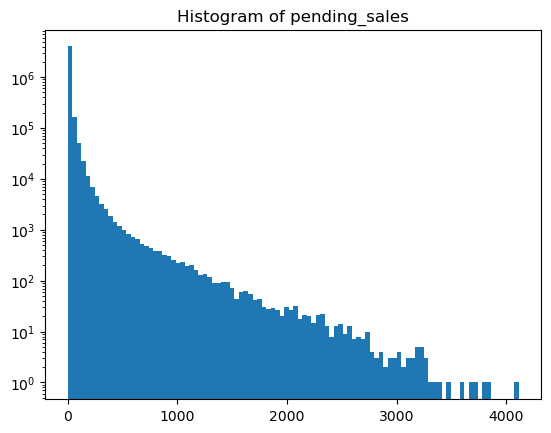

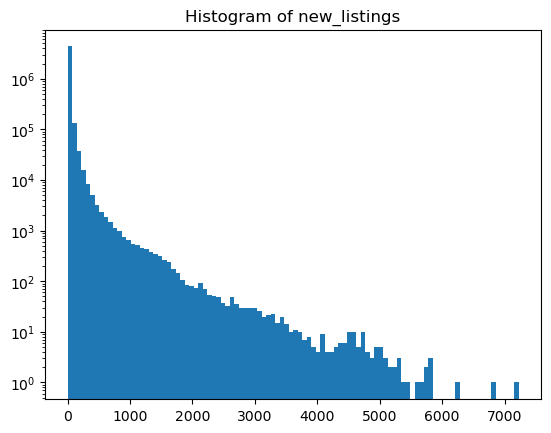

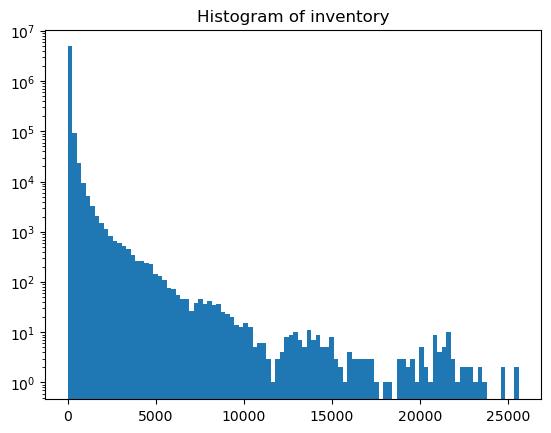

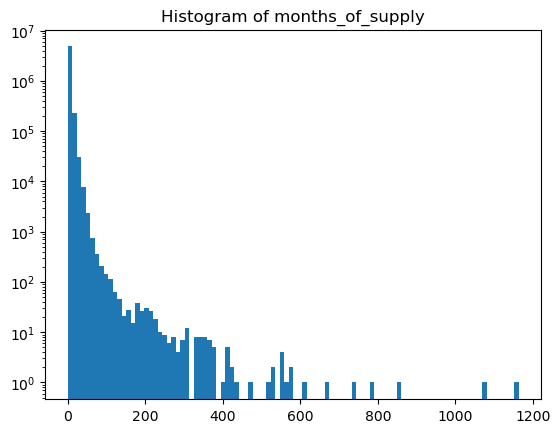

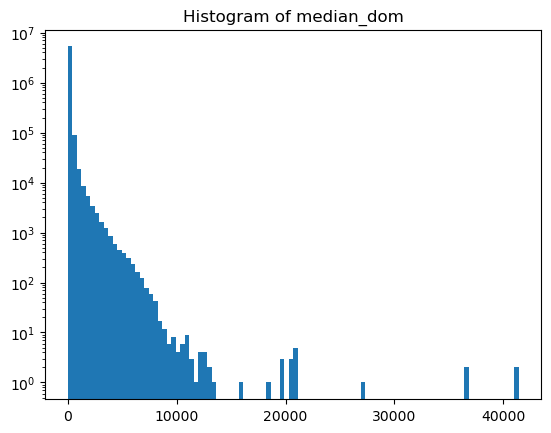

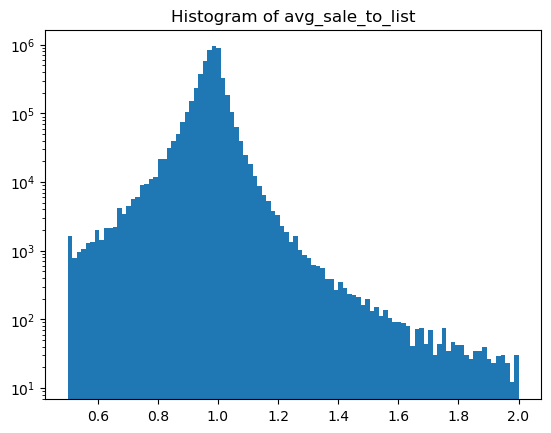

In [133]:
columns_new_hists = [
    'median_sale_price',
    'median_list_price',
    'median_ppsf',
    'median_list_ppsf',
    'homes_sold',
    'pending_sales',
    'new_listings',
    'inventory',
    'months_of_supply',
    'median_dom',
    'avg_sale_to_list']
for col in columns_new_hists:
    plt.figure()
    plt.hist(copy_with_selections_dropped[col], bins=100,log=True)
    plt.title(f'Histogram of {col}')
    plt.show()

Need to make better histograms for the following columns still

1. median_list_price
2. median_ppsf
3. median_list_ppsf

Note, however, that there are some outliers that are making them histograms look "off"

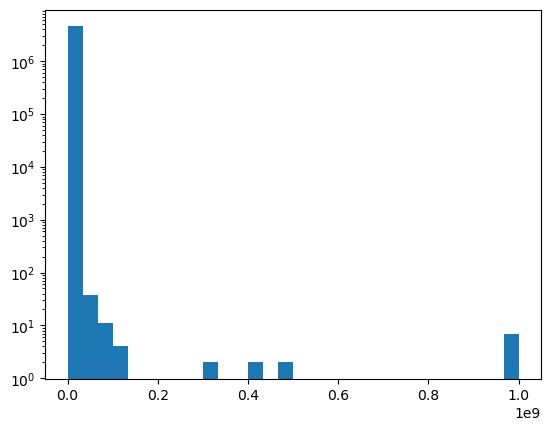

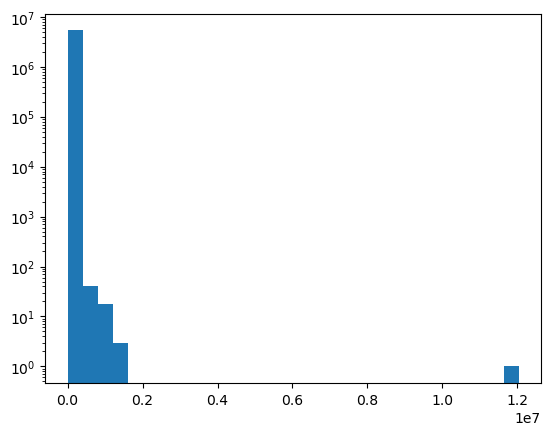

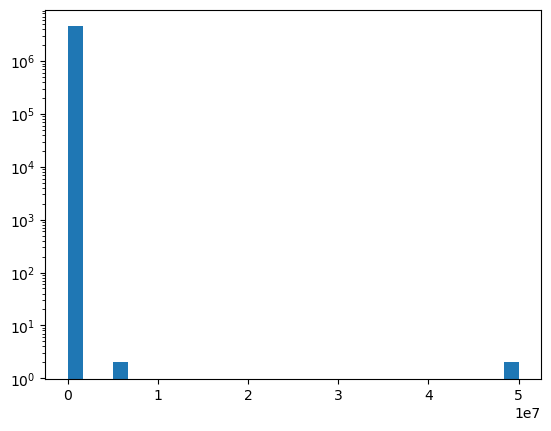

In [184]:
columns_improved_hists = ['median_list_price', 'median_ppsf', 'median_list_ppsf']
for col in columns_improved_hists:
    plt.figure()
    plt.hist(copy_with_selections_dropped[col], bins=30, log=True)
    plt.show()

Recap:
1. We have a year and month columns
2. We have dropped some columns with repeated information
3. We have dropped some columns with information that does not help our analysis
4. Now, have to deal with each null column at a time

In [186]:
copy_with_selections_dropped.isna().sum()

city                             0
state                            0
property_type                    0
median_sale_price             6136
median_list_price           897050
median_ppsf                  71619
median_list_ppsf            916811
homes_sold                    5710
pending_sales              1196615
new_listings                917420
inventory                   440012
months_of_supply            361102
median_dom                   73106
avg_sale_to_list            194260
sold_above_list              37177
price_drops                2609389
off_market_in_two_weeks    1090771
parent_metro_region              0
year                             0
month                            0
dtype: int64

In [198]:
copy_with_selections_dropped.loc[copy_with_selections_dropped['median_sale_price'].isna(), 'city'].unique()

array(['Stratmoor', 'Ellicott', 'Green Mountain Falls', 'Monument',
       'Fountain', 'Hawthorne', 'Calhan', 'Ramah', 'Florissant',
       'Colorado Springs', 'Manitou Springs', 'Black Forest', 'Arlington',
       'Palmer Lake', 'Westwood', 'Security-Widefield', 'Woodland Park',
       'Cresskill', 'Cripple Creek', 'Midland', 'Totowa', 'Woodmoor',
       'Cimarron Hills', 'Gleneagle', 'Caldwell', 'Peyton',
       'Cascade-Chipita Park', 'Norwood', 'Mendham', 'Ridgewood',
       'Hasbrouck Heights', 'Divide', 'Victor', 'Rutherford', 'Wheeling',
       'Goldfield', 'Montvale', 'Saddle Brook Township', 'Carbondale',
       'Kearny', 'Glen Rock', 'East Orange', 'Lodi', 'Lincoln Park',
       'Oradell', 'Ramsey', 'Dumont', 'Great Notch', 'River Edge',
       'Demarest', 'North Arlington', 'Rock Creek Park', 'Bergenfield',
       'Valley Falls', 'Fort Lee', 'Essex Fells', 'Ridgefield Park',
       'East Rutherford', 'Edgewater', 'Wanaque', 'Auburn', 'Wood-Ridge',
       'Old Tappan', 'Glen 

In [210]:
copy_with_selections_dropped.loc[(copy_with_selections_dropped['state'] == 'Colorado') & (copy_with_selections_dropped['median_sale_price'].isna())]

,city,state,property_type,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,price_drops,off_market_in_two_weeks,parent_metro_region,year,month
1339,Stratmoor,Colorado,Single Family Residential,NaN,159900.0,NaN,79.315476,NaN,3.0,7.0,28.0,NaN,NaN,NaN,0.000000,0.035714,0.00,"Colorado Springs, CO",2014,11
3037,Ellicott,Colorado,All Residential,NaN,315000.0,NaN,126.050420,NaN,2.0,1.0,2.0,NaN,NaN,NaN,0.000000,0.500000,0.50,"Colorado Springs, CO",2019,5
4547,Green Mountain Falls,Colorado,Single Family Residential,NaN,344750.0,NaN,159.726278,NaN,NaN,1.0,2.0,NaN,NaN,NaN,0.000000,0.500000,NaN,"Colorado Springs, CO",2016,8
9616,Monument,Colorado,All Residential,NaN,704500.0,NaN,217.890335,NaN,25.0,24.0,34.0,NaN,NaN,NaN,0.473684,0.205882,0.56,"Colorado Springs, CO",2023,4
9719,Fountain,Colorado,Multi-Family (2-4 Unit),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,"Colorado Springs, CO",2021,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5478720,Fountain,Colorado,Multi-Family (2-4 Unit),NaN,259950.0,NaN,123.606398,NaN,2.0,1.0,NaN,NaN,NaN,NaN,0.000000,NaN,0.50,"Colorado Springs, CO",2018,3
5479935,Ellicott,Colorado,All Residential,NaN,598900.0,NaN,264.209834,NaN,1.0,2.0,3.0,NaN,NaN,NaN,0.000000,0.333333,0.00,"Colorado Springs, CO",2023,4
5481324,Cascade-Chipita Park,Colorado,All Residential,NaN,749500.0,NaN,331.335074,NaN,1.0,4.0,7.0,NaN,NaN,NaN,0.333333,NaN,0.00,"Colorado Springs, CO",2021,10
5482604,Calhan,Colorado,Single Family Residential,NaN,769900.0,NaN,152.274525,NaN,NaN,1.0,5.0,NaN,NaN,NaN,0.333333,0.400000,NaN,"Colorado Springs, CO",2017,12


Strategy is to impute null values by the mean of rows with matching state and property type

In [213]:
# test to find mean of Colorado
state_condition = copy_with_selections_dropped['state'] == 'Colorado'
property_type_condition = copy_with_selections_dropped['property_type'] == 'All Residential'
year_condition = copy_with_selections_dropped['year
'] == 2014
selected_column = 'median_sale_price'
copy_with_selections_dropped.loc[(state_condition) & (property_type_condition) & (year_condition), selected_column].mean()

328728.279040404

In [215]:
# columns that have null values
columns_with_null = ['median_sale_price', 
                     'median_list_price',
                     'median_ppsf', 
                     'median_list_ppsf', 
                     'homes_sold', 
                     'pending_sales', 
                     'new_listings',
                     'inventory',
                     'months_of_supply',
                     'median_dom',
                     'avg_sale_to_list',
                     'sold_above_list',
                     'price_drops',
                     'off_market_in_two_weeks']

In [222]:
copy_test = copy_with_selections_dropped.copy(deep=True)

In [223]:
# Iterate through columns with null values
for col in columns_with_null:
    # Group by state, property type, and year, then fill NA with the mean within each group
    copy_test[col] = (
        copy_test.groupby(['state', 'property_type', 'year'])[col]
        .transform(lambda x: x.fillna(x.mean()))
    )

In [229]:
copy_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5484743 entries, 0 to 5484742
Data columns (total 20 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   city                     object 
 1   state                    object 
 2   property_type            object 
 3   median_sale_price        float64
 4   median_list_price        float64
 5   median_ppsf              float64
 6   median_list_ppsf         float64
 7   homes_sold               float64
 8   pending_sales            float64
 9   new_listings             float64
 10  inventory                float64
 11  months_of_supply         float64
 12  median_dom               float64
 13  avg_sale_to_list         float64
 14  sold_above_list          float64
 15  price_drops              float64
 16  off_market_in_two_weeks  float64
 17  parent_metro_region      object 
 18  year                     int32  
 19  month                    int32  
dtypes: float64(14), int32(2), object(4)
memory usa

In [230]:
copy_test.isna().sum().max()

207502

In [231]:
207502/5484743

0.037832583951517874

Just dropping the 207502 rows would be roughly getting rid of 3.78% of our data. Let's see if we can do better than this with lesser restrictions. 

In [232]:
# make another copy
copy_test2 = copy_test.copy(deep=True)

In [234]:
# trying to impute again but being more lenient
# Iterate through columns with null values
for col in columns_with_null:
    # Group by state, property type, and year, then fill NA with the mean within each group
    copy_test2[col] = (
        copy_test2.groupby(['state', 'year'])[col]
        .transform(lambda x: x.fillna(x.mean()))
    )

In [235]:
copy_test2.isna().sum()

city                            0
state                           0
property_type                   0
median_sale_price               0
median_list_price               0
median_ppsf                     0
median_list_ppsf                0
homes_sold                      0
pending_sales                   0
new_listings                    0
inventory                       0
months_of_supply                0
median_dom                      0
avg_sale_to_list             6415
sold_above_list                 0
price_drops                174474
off_market_in_two_weeks         0
parent_metro_region             0
year                            0
month                           0
dtype: int64

In [236]:
174474/5484743

0.03181078858207212

Just dropping the 174474 rows would be roughly getting rid of 3.18% of our data. Let's see if we can do better than this with lesser restrictions. 

In [237]:
# one more attempt
copy_test3 = copy_test2.copy(deep=True)

In [238]:
# trying to impute again but being even more lenient
# Iterate through columns with null values
for col in columns_with_null:
    # Group by state, property type, and year, then fill NA with the mean within each group
    copy_test3[col] = (
        copy_test3.groupby(['year'])[col]
        .transform(lambda x: x.fillna(x.mean()))
    )

In [239]:
copy_test3.isna().sum()

city                       0
state                      0
property_type              0
median_sale_price          0
median_list_price          0
median_ppsf                0
median_list_ppsf           0
homes_sold                 0
pending_sales              0
new_listings               0
inventory                  0
months_of_supply           0
median_dom                 0
avg_sale_to_list           0
sold_above_list            0
price_drops                0
off_market_in_two_weeks    0
parent_metro_region        0
year                       0
month                      0
dtype: int64

Nice, we were able to successfully impute! We now have no null values in our data set

In [240]:
copy_test3.describe()

,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,price_drops,off_market_in_two_weeks,year,month
count,5.484743e+06,5.484743e+06,5.484743e+06,5.484743e+06,5.484743e+06,5.484743e+06,5.484743e+06,5.484743e+06,5.484743e+06,5.484743e+06,5.484743e+06,5.484743e+06,5.484743e+06,5.484743e+06,5.484743e+06,5.484743e+06
mean,3.101317e+05,3.418722e+05,1.903836e+02,2.120553e+02,1.464499e+01,1.397302e+01,1.964265e+01,4.715140e+01,4.189325e+00,1.000290e+02,9.734046e-01,2.315278e-01,2.650589e-01,2.773611e-01,2.018047e+03,6.484383e+00
std,4.177742e+05,1.288952e+06,5.928607e+03,3.042591e+04,5.620837e+01,4.860098e+01,6.973297e+01,1.977835e+02,4.910369e+00,2.178838e+02,6.001909e-02,2.932667e-01,1.508116e-01,2.848178e-01,3.509792e+00,3.398437e+00
min,1.000000e+00,2.900000e+02,2.500000e-04,3.992174e-03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,5.000000e-01,0.000000e+00,1.090869e-04,0.000000e+00,2.012000e+03,1.000000e+00
25%,1.340000e+05,1.649500e+05,8.591045e+01,9.962929e+01,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00,1.700000e+00,2.900000e+01,9.543815e-01,0.000000e+00,1.818182e-01,0.000000e+00,2.015000e+03,4.000000e+00
50%,2.199000e+05,2.517616e+05,1.292960e+02,1.421042e+02,4.000000e+00,5.000000e+00,7.000000e+00,1.500000e+01,3.000000e+00,5.900000e+01,9.798387e-01,1.250000e-01,2.500000e-01,2.222222e-01,2.018000e+03,6.000000e+00
75%,3.625000e+05,3.990000e+05,2.004061e+02,2.140078e+02,1.100000e+01,1.252127e+01,1.800000e+01,3.920478e+01,5.000000e+00,1.090000e+02,1.000000e+00,3.750000e-01,3.210559e-01,4.444444e-01,2.021000e+03,9.000000e+00
max,1.000000e+08,1.000000e+09,1.203300e+07,5.000000e+07,4.579000e+03,4.112000e+03,7.224000e+03,2.559200e+04,1.163000e+03,4.139100e+04,2.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.024000e+03,1.200000e+01


In [241]:
copy_test4 = copy_test3.copy(deep=True)

In [244]:
copy_test4.sample(10)

,city,state,property_type,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,price_drops,off_market_in_two_weeks,parent_metro_region,year,month
5115560,Adams Center,New York,Single Family Residential,172000.0,1.420000e+05,106.172840,84.523810,1.0,3.000000,3.000000,11.00000,11.000000,238.000000,1.023810,1.000,0.176484,0.666667,"Watertown, NY",2012,9
5280240,Star City,Arkansas,Single Family Residential,28400.0,7.250000e+04,21.130952,34.643308,1.0,10.953405,2.000000,7.00000,7.000000,17.000000,0.982699,0.000,0.428571,0.160932,"Pine Bluff, AR",2015,11
5246500,The Village,Oklahoma,Multi-Family (2-4 Unit),172000.0,1.983263e+05,113.756614,114.163494,1.0,4.795082,5.943396,5.81746,1.671429,48.952381,1.011765,1.000,0.403702,0.502023,"Oklahoma City, OK",2021,11
366799,Highgrove,California,Multi-Family (2-4 Unit),285000.0,2.745000e+05,109.615385,123.306875,1.0,1.000000,1.000000,3.00000,3.000000,58.000000,0.840708,0.000,0.322562,0.000000,"Riverside, CA",2013,12
3250892,Ulster,New York,All Residential,460000.0,2.670000e+05,115.000000,134.612498,1.0,10.253251,2.000000,13.00000,13.000000,1105.000000,0.921844,0.000,0.225128,0.172810,"Kingston, NY",2017,8
5326790,Acalanes Ridge,California,Single Family Residential,2137500.0,1.647000e+06,846.686814,696.008388,2.0,4.000000,2.000000,33.05208,1.818278,7.000000,1.136383,1.000,0.239359,0.750000,"Oakland, CA",2021,7
2194563,Clarks Summit,Pennsylvania,Single Family Residential,180000.0,1.500000e+05,92.936384,95.363636,2.0,3.231819,8.000000,38.00000,19.000000,132.000000,0.979566,0.000,0.240658,0.201154,"Scranton, PA",2012,3
1662022,Osseo,Minnesota,Townhouse,146000.0,2.813750e+05,89.680590,101.938542,1.0,2.000000,2.000000,5.00000,5.000000,200.000000,0.973983,0.000,0.200000,0.000000,"Minneapolis, MN",2012,9
3463906,Lincoln,Nebraska,Multi-Family (2-4 Unit),235000.0,2.944500e+05,81.333223,150.868155,8.0,11.000000,15.000000,25.00000,3.100000,35.000000,0.986505,0.375,0.160000,0.909091,"Lincoln, NE",2023,5
4108221,Fort Devens,Massachusetts,All Residential,50000.0,3.513870e+05,46.339203,191.493973,1.0,8.895793,20.111195,3.00000,3.000000,431.000000,0.769231,0.000,0.180968,0.070753,"Boston, MA",2012,1


In [245]:
# sorting by year
copy_test4.sort_values(by=['year', 'month'], inplace=True)

In [246]:
copy_test4.head(10)

,city,state,property_type,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,price_drops,off_market_in_two_weeks,parent_metro_region,year,month
163,Surfside,Florida,Single Family Residential,375000.0,512500.000000,255.681818,314.471653,3.0,2.000000,24.932991,118.127451,17.000000,187.31543,0.934025,0.000000,0.002764,0.000000,"Miami, FL",2012,1
321,Stratford,California,Single Family Residential,80000.0,441723.893881,66.555740,228.896179,1.0,1.000000,30.154512,1.000000,1.000000,49.00000,1.032258,1.000000,0.254871,0.000000,"Hanford, CA",2012,1
475,Massapequa Park,New York,All Residential,413000.0,399000.000000,266.451613,284.371195,9.0,4.000000,11.000000,62.000000,6.900000,105.00000,0.978421,0.111111,0.322581,0.250000,"Nassau County, NY",2012,1
564,San Miguel,California,All Residential,139000.0,240000.000000,131.132075,152.963671,3.0,1.000000,3.000000,19.000000,6.300000,169.00000,0.902366,0.000000,0.246345,0.000000,"San Luis Obispo, CA",2012,1
924,East Bloomfield,New York,Single Family Residential,85000.0,108000.000000,151.785714,88.815789,1.0,4.127396,3.000000,33.000000,33.000000,118.00000,0.945495,0.000000,0.176484,0.119002,"Rochester, NY",2012,1
1111,Moores Mill,Alabama,All Residential,132341.0,114900.000000,90.009111,76.251830,4.0,2.000000,10.000000,40.000000,10.000000,124.00000,0.953863,0.750000,0.022222,0.000000,"Huntsville, AL",2012,1
1123,South Venice,Florida,Townhouse,90000.0,178864.031224,28.427037,110.325434,1.0,4.334318,8.183986,33.053555,5.952984,172.00000,0.909091,0.000000,0.006492,0.108898,"North Port, FL",2012,1
1240,Chardon,Ohio,Single Family Residential,60474.5,137700.000000,48.318905,86.649328,2.0,1.000000,9.000000,54.000000,27.000000,87.00000,0.909532,0.000000,0.030303,0.000000,"Cleveland, OH",2012,1
1419,Obetz,Ohio,All Residential,75000.0,59900.000000,47.348485,42.968750,5.0,4.000000,7.000000,10.000000,2.000000,32.00000,0.996265,0.200000,0.022727,0.500000,"Columbus, OH",2012,1
1486,Cloverly,Maryland,All Residential,420000.0,419900.000000,137.437212,175.018235,6.0,2.000000,13.000000,50.000000,8.300000,223.00000,0.978423,0.333333,0.240000,0.000000,"Frederick, MD",2012,1


In [247]:
copy_test4.to_csv('checkPoint1.csv')